In [1]:
from ThOPqkdsim.sim8 import *
import numpy as np

In [2]:

# Example usage function
def run_decoy_state_qkd_simulation():
    """Main function to demonstrate the QKD simulator"""
    # Define simulation parameters
    params = {
        'wavelength': 1550,     # nm
        'alpha': 0.21,          # dB/km
        'e_detector': 0.033,    # detector error probability (3.3%)
        'Y0': 1.7e-6,           # background rate
        'eta_bob': 0.045,       # Bob's side efficiency
        'mu': 0.5,              # signal state intensity
        'nu1': 0.1,             # decoy state 1 intensity
        'nu2': 0.0,             # decoy state 2 intensity (vacuum)
        'f': 1.22,              # error correction efficiency
        'q': 0.5,               # protocol efficiency factor (1/2 for BB84)
        'rep_rate': 1e6         # repetition rate in Hz 
    }
    
    # Create QKD simulator with specified parameters
    qkd = DecoyStateQKD(**params)
    
    # Example of calculating key rate at specific distance
    distance = 50  # km
    rate, qber, gain, Y1_L, e1_U, Q1_L = qkd.key_rate(distance)
    print(f"Key Rate at {distance} km: {rate:.2f} bits/s")
    print(f"QBER at {distance} km: {qber*100:.2f}%")
    
    # Generate plots
    
    
    plot_qber_vs_mu(qkd, distance=50)
    plot_qber_vs_distance(qkd)
    plot_key_rate_vs_distance(qkd)
    plot_key_rate_vs_mu(qkd, distance=50)
    plot_key_rate_vs_error(qkd, distance=50)
    
    # Example of parameter optimization
    print("\nFinding optimal signal state intensity...")
    mu_values, mu_key_rates, _ = analyze_mu_dependence(qkd, distance=50)
    optimal_idx = np.argmax(mu_key_rates)
    print(f"Optimal μ at 50 km: {mu_values[optimal_idx]:.2f}")
    print(f"Optimal key rate: {mu_key_rates[optimal_idx]:.2f} bits/s")



    

Key Rate at 50 km: 194.58 bits/s
QBER at 50 km: 3.34%


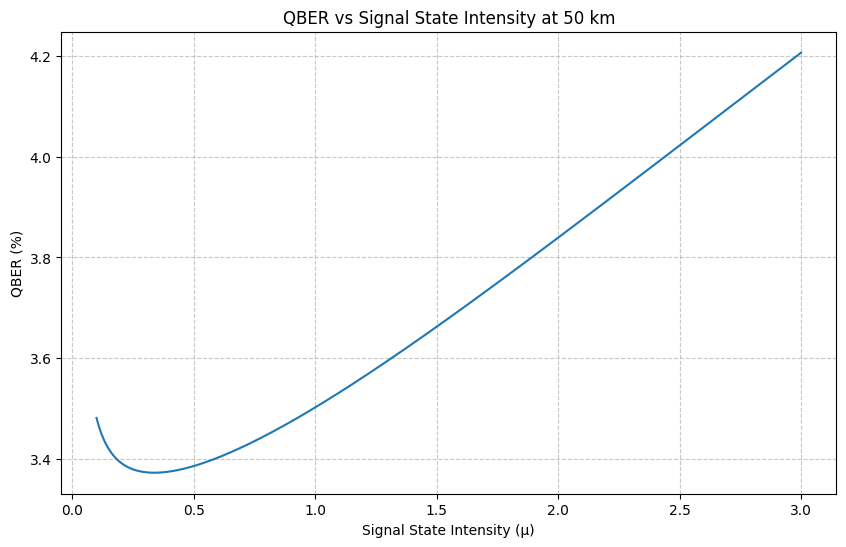

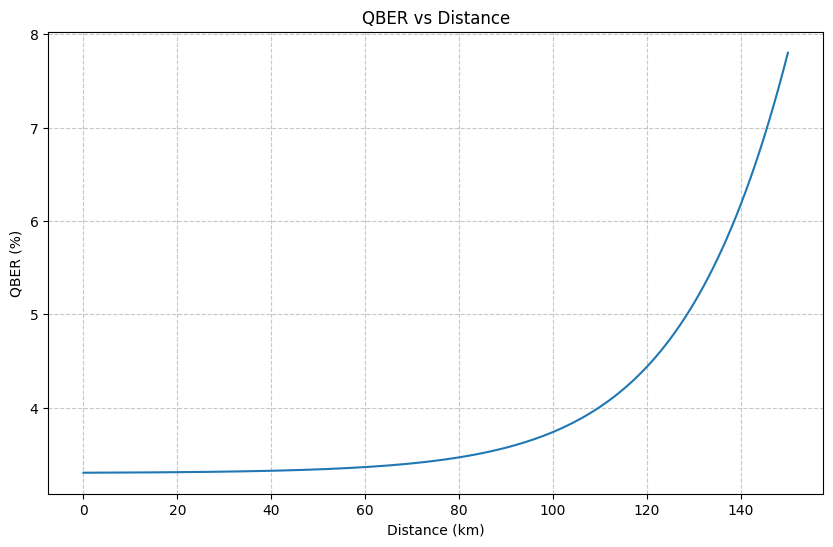

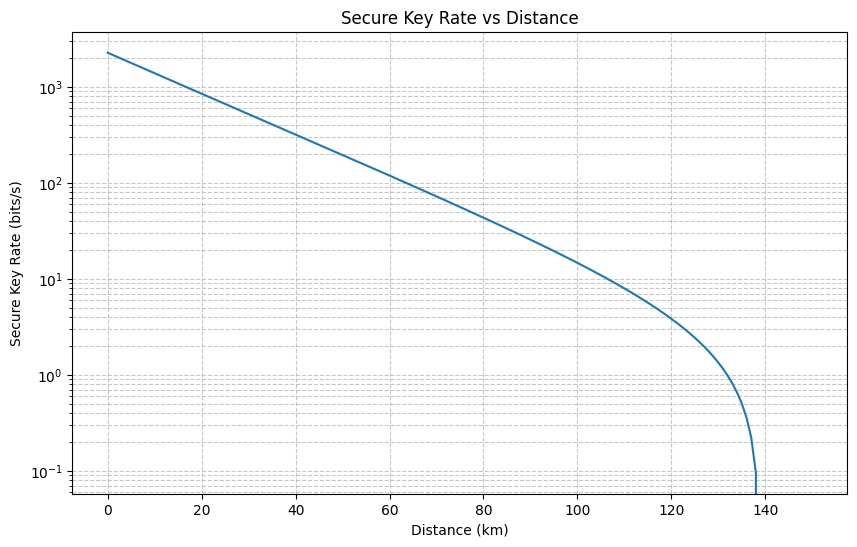

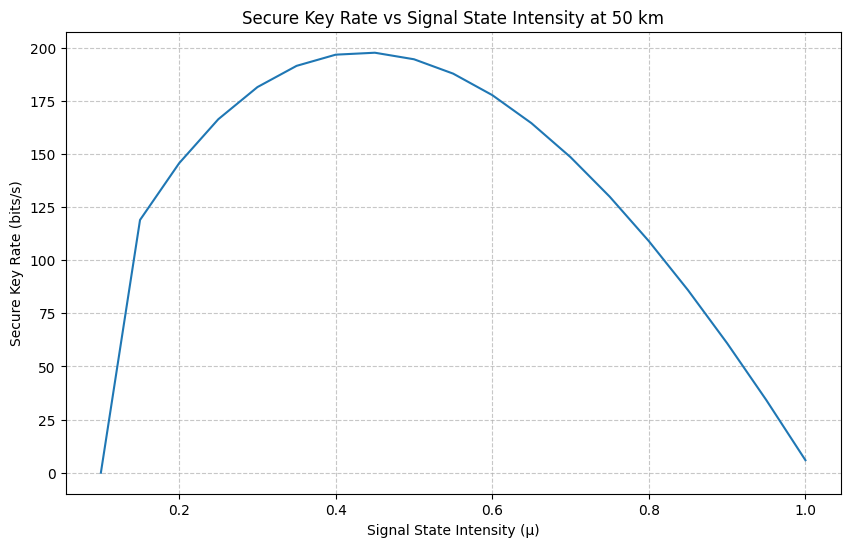

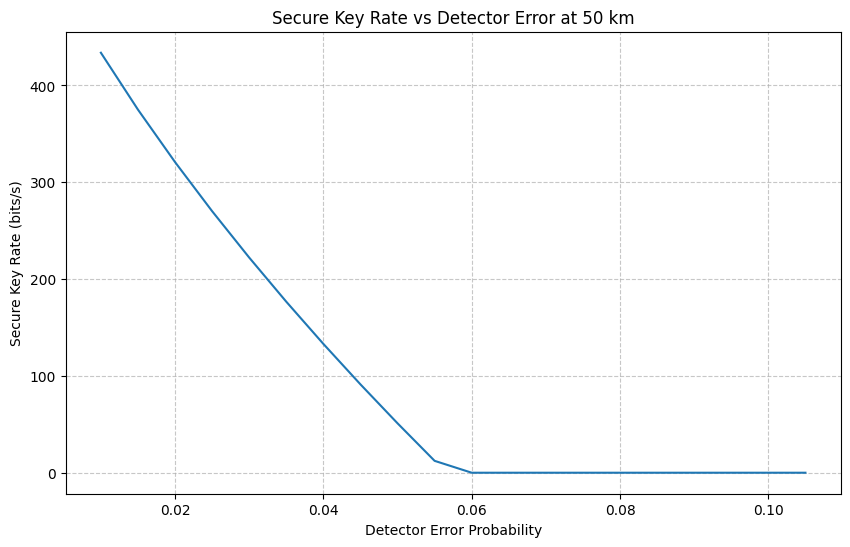


Finding optimal signal state intensity...
Optimal μ at 50 km: 0.45
Optimal key rate: 197.67 bits/s


In [3]:
run_decoy_state_qkd_simulation()